In [2]:
# chi2 rozdeleni -- intervalovy odhad parametru, muze byt stredni hodnota treba 30? 
# 1) testovani rozptylu jednoho vyberu
# 2) pri testovani zda data jsou z urciteho rozdeleni
# 3) nezavislost kategorii, nezavistlost mezi vektory


# zjistete 5 a 95 kvantil chi2square rozdeleni s 10 stupni volnosti
import scipy.stats as stats
import numpy as np

# 10 stupnu volnosti odpovida zhruba 11 namerenym datum 

alpha = 0.05
df = 10

# 5% kvantil
q_5 = stats.chi2.ppf(alpha, df)

# 95% kvantil
q_95 = stats.chi2.ppf(1-alpha, df)

print(q_5, q_95)


# OKOKOKOKOK


# in matlab:
# chi2inv(0.05, 10)
# chi2inv(0.95, 10)


# studentovo rozdeleni
# fisherovo rozdeleni

3.9402991361190605 18.307038053275146


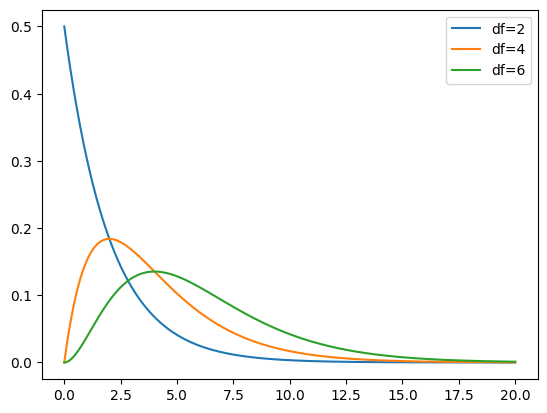

In [5]:
# vykreslete graf hustoty pravdepodobnosti chi2 rozdeleni s 2, 4, 6 stupni volnosti

import matplotlib.pyplot as plt

x = np.linspace(0, 20, 1000)

for df in [2, 4, 6]:
    y = stats.chi2.pdf(x, df)
    plt.plot(x, y, label=f'df={df}')
    
plt.legend()
plt.show()

# OK


In [7]:
# studentovo rozdeleni 
# 1) testovani strednich hodnot jednoho vyberu
# 2) testovani strednich hodnot 2 vybery (jestli jsou data z normalniho rozdeleni)
# 3) testovani linearni regrese

# urcete pravdepodobnost ze studentovo rozdeleni s 2, 4, 10, 100 stupni volnosti nabyva P(X > 1)

df = [2, 4, 10, 100]

for d in df:
    p = 1 - stats.t.cdf(1, d)
    print(f'df={d}, P(X > 1) = {p}')
    
    
# urcete pravdepodbnost i pro normovane rozdeleni
p = 1 - stats.norm.cdf(1)
print(f'Normal distribution, P(X > 1) = {p}')

# OK

df=2, P(X > 1) = 0.21132486540518713
df=4, P(X > 1) = 0.1869504831500295
df=10, P(X > 1) = 0.17044656615103004
df=100, P(X > 1) = 0.15986207789206186
Normal distribution, P(X > 1) = 0.15865525393145707


In [17]:
# fisher-schnedercorovo rozdeleni
# -- 2 stupne volnosti
# 1) testovani schody rozptylu 2 vyberu
# 2) testovani schody strednich hodnot vice nez 2 vyberu
# 3) testovani schody regresniho koeficientu

# namereili jsme 10 udaju o zivnotnosti zarovky 380, 402, 408, 412, 454, 459, 472, 481, 491, 502 hodin. Odhadnete, zda data jsou z normalniho rozdeleni a dale urcete 95% intervalovt odhad stredni hodnoty zivotnosti zarovky. Urcete i 95% jednostranny intervalovy odhad pro minimalni a maximalni odhad stredni hodnoty

data = np.array([380, 402, 408, 412, 454, 459, 472, 481, 491, 502])

# test normality
alpha = 0.05

# do not use fisher-schnedercorovo rozdeleni, use shapiro-wilk test
# H0: data jsou z normalniho rozdeleni
# H1: data nejsou z normalniho rozdeleni

stat, p = stats.shapiro(data)

if p < alpha:
    print('Data nejsou z normalniho rozdeleni')
else:
    print('Data jsou z normalniho rozdeleni')

    
# intervalovy odhad stredni hodnoty
n = len(data)

mean = np.mean(data)
std = np.std(data, ddof=1)

df = n - 1

t = stats.t.ppf(1-alpha/2, df)

# what is stats.t.ppf

ci = t * std / np.sqrt(n)

print(f'95% intervalovy odhad stredni hodnoty: {mean} +- {ci}')

# in matlab:
# tinv(0.975, 9) * std(data) / sqrt(10)

# 95% jednostranny intervalovy odhad pro minimalni a maximalni hodnotu stredni hodnoty
ci_min = t * std / np.sqrt(n)
ci_max = t * std / np.sqrt(n)

print(f'95% jednostranny intervalovy odhad pro minimalni hodnotu stredni hodnoty: {mean - ci_min}')
print(f'95% jednostranny intervalovy odhad pro maximalni hodnotu stredni hodnoty: {mean + ci_max}')

# in matlab:
# ttest(data, 500, 0.05, 'both')

# ttest in python:

# Perform one-sample t-test
mu = 500
t_stat, p_value = stats.ttest_1samp(data, mu, alternative='two-sided')

# Display results
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis at the 5% significance level.")
else:
    print("Do not reject the null hypothesis at the 5% significance level.")








Data jsou z normalniho rozdeleni
95% intervalovy odhad stredni hodnoty: 446.1 +- 30.337749516980566
95% jednostranny intervalovy odhad pro minimalni hodnotu stredni hodnoty: 415.76225048301944
95% jednostranny intervalovy odhad pro maximalni hodnotu stredni hodnoty: 476.4377495169806
t-statistic: -4.0190941323282035
p-value: 0.003022181488504111
Reject the null hypothesis at the 5% significance level.


In [18]:
# Střední hodnota a směrodatná odchylka
mean = np.mean(data)
std = np.std(data, ddof=1)  # ddof=1 pro výběrovou směrodatnou odchylku

# Počet hodnot a stupně volnosti
n = len(data)
dof = n - 1

# 95% interval spolehlivostiz
confidence = 0.95
t_critical = stats.t.ppf((1 + confidence) / 2, dof)
margin_error = t_critical * (std / np.sqrt(n))
ci_lower = mean - margin_error
ci_upper = mean + margin_error

print(f"95% Confidence Interval of the Mean: ({ci_lower:.2f}, {ci_upper:.2f})")
# Minimální odhad (dolní hranice)
t_critical_lower = stats.t.ppf(0.05, dof)  # Jednostranný test, 5% hranice
ci_min = mean + t_critical_lower * (std / np.sqrt(n))

# Maximální odhad (horní hranice)
t_critical_upper = stats.t.ppf(0.95, dof)  # Jednostranný test, 95% hranice
ci_max = mean + t_critical_upper * (std / np.sqrt(n))

print(f"95% Lower Bound of the Mean: {ci_min:.2f}")
print(f"95% Upper Bound of the Mean: {ci_max:.2f}")


# NEOK

95% Confidence Interval of the Mean: (415.76, 476.44)
95% Lower Bound of the Mean: 421.52
95% Upper Bound of the Mean: 470.68


Př. 4: Z 12 pozorování doby trvání montážní operace byl zjištěn průměr 44 s a směrodatná odchylka 4 s. Sestrojte 90% interval spolehlivosti pro očekávanou délku operace, jestliže daná operace má normální rozdělení.
Protože nemáte naměřená data, musíte počítat dle vzorců z přednášek. 
[41.926 s, 46.074 s]


In [19]:
# 90% interval spolehlivosti pro očekávanou délku operace

# Data
mean = 44
std = 4

# Počet hodnot a stupně volnosti
n = 12
dof = n - 1

# 90% interval spolehlivosti
confidence = 0.90
t_critical = stats.t.ppf((1 + confidence) / 2, dof)
margin_error = t_critical * (std / np.sqrt(n))
ci_lower = mean - margin_error
ci_upper = mean + margin_error

print(f"90% Confidence Interval of the Mean: ({ci_lower:.3f}, {ci_upper:.3f})")


# in matlab:
# tinv(0.95, 11) * 4 / sqrt(12)

90% Confidence Interval of the Mean: (41.926, 46.074)


Př. 6: V prodejně si udělali průzkum, kolik zákazníků přijde do obchodu během jednoho dne. Byly zjištěny následující data:
x=[541,574,585,596,612,618,632,641,654,671,681,692,711,713,718,719,754,796,812,815,835,858];
Ověřte, že data jsou z normálního rozdělení. Zjistěte 99% interval spolehlivosti odhadu střední hodnoty.
[637.6, 746.8 hod]


In [20]:

# Data
data = np.array([541, 574, 585, 596, 612, 618, 632, 641, 654, 671, 681, 692, 711, 713, 718, 719, 754, 796, 812, 815, 835, 858])

# Test normality
alpha = 0.05
stat, p = stats.shapiro(data)

if p < alpha:
    print('Data nejsou z normálního rozdělení')
else:
    print('Data jsou z normálního rozdělení')
    
    
# 99% interval spolehlivosti odhadu střední hodnoty
mean = np.mean(data)
std = np.std(data, ddof=1)  # ddof=1 pro výběrovou směrodatnou odchylku

n = len(data)
dof = n - 1

confidence = 0.99
t_critical = stats.t.ppf((1 + confidence) / 2, dof)
margin_error = t_critical * (std / np.sqrt(n))

ci_lower = mean - margin_error
ci_upper = mean + margin_error

print(f"99% Confidence Interval of the Mean: ({ci_lower:.1f}, {ci_upper:.1f})")

# in matlab:

# [h, p, ci, stats] = ttest(data, 500, 0.01, 'both')
# ta hdnota 500 toho prumeru muze byt zvolena nahodne asi

Data jsou z normálního rozdělení
99% Confidence Interval of the Mean: (637.6, 746.8)
